## Todo

* [ ] Clean up plots
* [ ] Do some more categorical plots
* [ ] Figure out a model and anlaysis

Import, tidy and analyze the NYPD Shooting Incident dataset obtained. Be sure your project is reproducible and contains some visualization and analysis. You may use the data to do any analysis that is of interest to you. You should include at least two visualizations and one model. Be sure to identify any bias possible in the data and in your analysis.

In [1]:
library(tidyverse)
library(lubridate)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
source_url <- "https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD"

incident_df <- read.csv(source_url)

In [3]:
glimpse(incident_df)

Rows: 28,562
Columns: 21
$ INCIDENT_KEY            <int> 244608249, 247542571, 84967535, 202853370, 270~
$ OCCUR_DATE              <chr> "05/05/2022", "07/04/2022", "05/27/2012", "09/~
$ OCCUR_TIME              <chr> "00:10:00", "22:20:00", "19:35:00", "21:00:00"~
$ BORO                    <chr> "MANHATTAN", "BRONX", "QUEENS", "BRONX", "BROO~
$ LOC_OF_OCCUR_DESC       <chr> "INSIDE", "OUTSIDE", "", "", "", "", "", "", "~
$ PRECINCT                <int> 14, 48, 103, 42, 83, 23, 113, 77, 48, 49, 73, ~
$ JURISDICTION_CODE       <int> 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ LOC_CLASSFCTN_DESC      <chr> "COMMERCIAL", "STREET", "", "", "", "", "", ""~
$ LOCATION_DESC           <chr> "VIDEO STORE", "(null)", "", "", "", "MULTI DW~
$ STATISTICAL_MURDER_FLAG <chr> "true", "true", "false", "false", "false", "fa~
$ PERP_AGE_GROUP          <chr> "25-44", "(null)", "", "25-44", "25-44", "", "~
$ PERP_SEX                <chr> "M", "(null)", "", "M", "M", "", "", "", "", "~
$ PERP_RACE    

In [4]:
desc_counts <- lapply(incident_df[, c("LOC_CLASSFCTN_DESC", "LOCATION_DESC", "PERP_RACE", "VIC_RACE","LOC_OF_OCCUR_DESC")], table)

print(desc_counts)

$LOC_CLASSFCTN_DESC

                 (null)  COMMERCIAL    DWELLING     HOUSING       OTHER 
      25596           2         208         243         460          59 
PARKING LOT  PLAYGROUND      STREET     TRANSIT     VEHICLE 
         15          41        1886          23          29 

$LOCATION_DESC

                                             (null)                       ATM 
                    14977                      1711                         1 
                     BANK            BAR/NIGHT CLUB         BEAUTY/NAIL SALON 
                        3                       668                       119 
              CANDY STORE               CHAIN STORE                CHECK CASH 
                        7                         7                         1 
        CLOTHING BOUTIQUE           COMMERCIAL BLDG                DEPT STORE 
                       14                       304                         9 
           DOCTOR/DENTIST                DRUG STORE       DRY 

```r
# Modify, reorder, and select columns in a pipeline
cleaned_df <- df %>%
  # Rename 'category' to 'type' and 'value' to 'score'
  rename(type = category, score = value) %>%
  
  # Reorder columns: put 'type' first, followed by 'id', and 'date' and 'score'
  select(type, id, date, score) %>%
  
  # Remove rows where 'score' is less than 15
  select(score >= 15)

  # remove completely
  select(-bad_column)
  ```

In [5]:
# make a nicer datetime column
clean_incident_df <- incident_df %>%
  mutate(Date = as.POSIXct(paste(OCCUR_DATE, OCCUR_TIME), format="%m/%d/%Y %H:%M:%S")) %>%
  rename(In_Out = LOC_OF_OCCUR_DESC, Location_Category = LOC_CLASSFCTN_DESC, Location_details = LOCATION_DESC) %>%
  select(Date, BORO, Location_Category, Location_details, In_Out, OCCUR_DATE, OCCUR_TIME, -JURISDICTION_CODE, -X_COORD_CD, -Y_COORD_CD, everything())

glimpse(clean_incident_df)
summary(clean_incident_df)

Rows: 28,562
Columns: 22
$ Date                    <dttm> 2022-05-05 00:10:00, 2022-07-04 22:20:00, 201~
$ BORO                    <chr> "MANHATTAN", "BRONX", "QUEENS", "BRONX", "BROO~
$ Location_Category       <chr> "COMMERCIAL", "STREET", "", "", "", "", "", ""~
$ Location_details        <chr> "VIDEO STORE", "(null)", "", "", "", "MULTI DW~
$ In_Out                  <chr> "INSIDE", "OUTSIDE", "", "", "", "", "", "", "~
$ OCCUR_DATE              <chr> "05/05/2022", "07/04/2022", "05/27/2012", "09/~
$ OCCUR_TIME              <chr> "00:10:00", "22:20:00", "19:35:00", "21:00:00"~
$ INCIDENT_KEY            <int> 244608249, 247542571, 84967535, 202853370, 270~
$ PRECINCT                <int> 14, 48, 103, 42, 83, 23, 113, 77, 48, 49, 73, ~
$ JURISDICTION_CODE       <int> 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ STATISTICAL_MURDER_FLAG <chr> "true", "true", "false", "false", "false", "fa~
$ PERP_AGE_GROUP          <chr> "25-44", "(null)", "", "25-44", "25-44", "", "~
$ PERP_SEX     

      Date                           BORO           Location_Category 
 Min.   :2006-01-01 02:00:00.0   Length:28562       Length:28562      
 1st Qu.:2009-09-04 07:15:00.0   Class :character   Class :character  
 Median :2013-09-20 17:56:00.0   Mode  :character   Mode  :character  
 Mean   :2014-06-07 20:04:22.2                                        
 3rd Qu.:2019-09-30 10:10:30.0                                        
 Max.   :2023-12-29 21:22:00.0                                        
                                                                      
 Location_details      In_Out           OCCUR_DATE         OCCUR_TIME       
 Length:28562       Length:28562       Length:28562       Length:28562      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                               

In [6]:
time_series_df <- clean_incident_df %>%
    mutate(simple_date = as.Date(OCCUR_DATE, format = "%m/%d/%Y")) %>%
    group_by(simple_date) %>%
    # Add a new column that represents only the month and year
    summarise(total_by_day = n()) %>%
    mutate(month_year = floor_date(simple_date, "month")) 

df_aggregated <- time_series_df %>%
  mutate(year = format(simple_date, "%Y"),  # Extract year
         month = format(simple_date, "%m")) %>%  # Extract month
  group_by(year, month) %>%
  summarise(total_by_day = sum(total_by_day)) %>%
  ungroup()    

tail(time_series_df)
tail(df_aggregated)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


simple_date,total_by_day,month_year
<date>,<int>,<date>
2023-12-22,8,2023-12-01
2023-12-23,4,2023-12-01
2023-12-24,5,2023-12-01
2023-12-26,6,2023-12-01
2023-12-27,1,2023-12-01
2023-12-29,3,2023-12-01


year,month,total_by_day
<chr>,<chr>,<int>
2023,07,152
2023,08,108
2023,09,105
2023,10,99
2023,11,71
2023,12,83


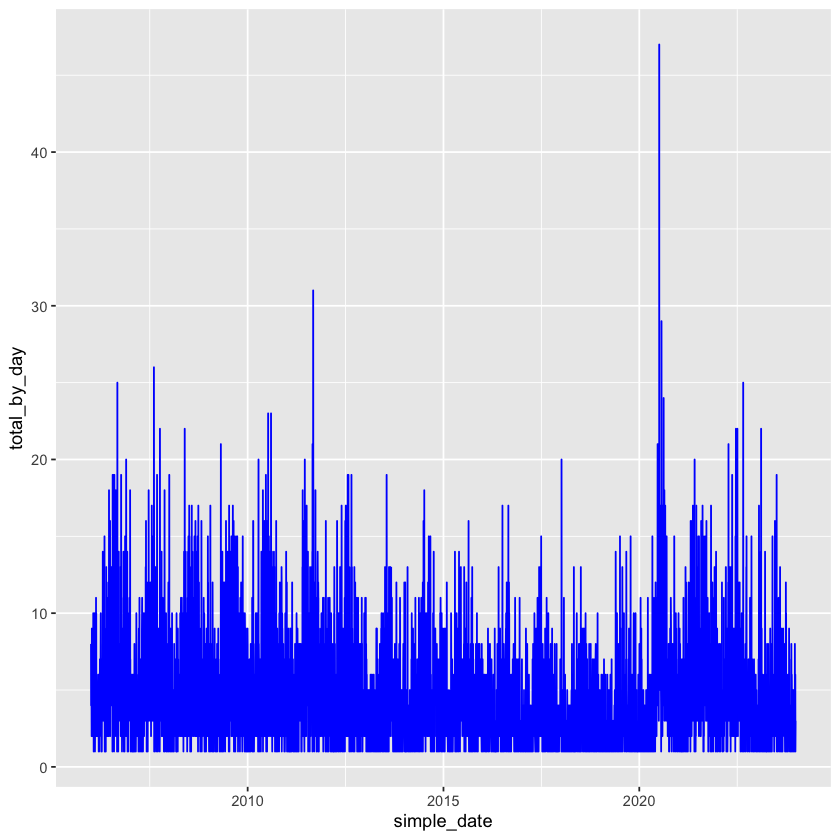

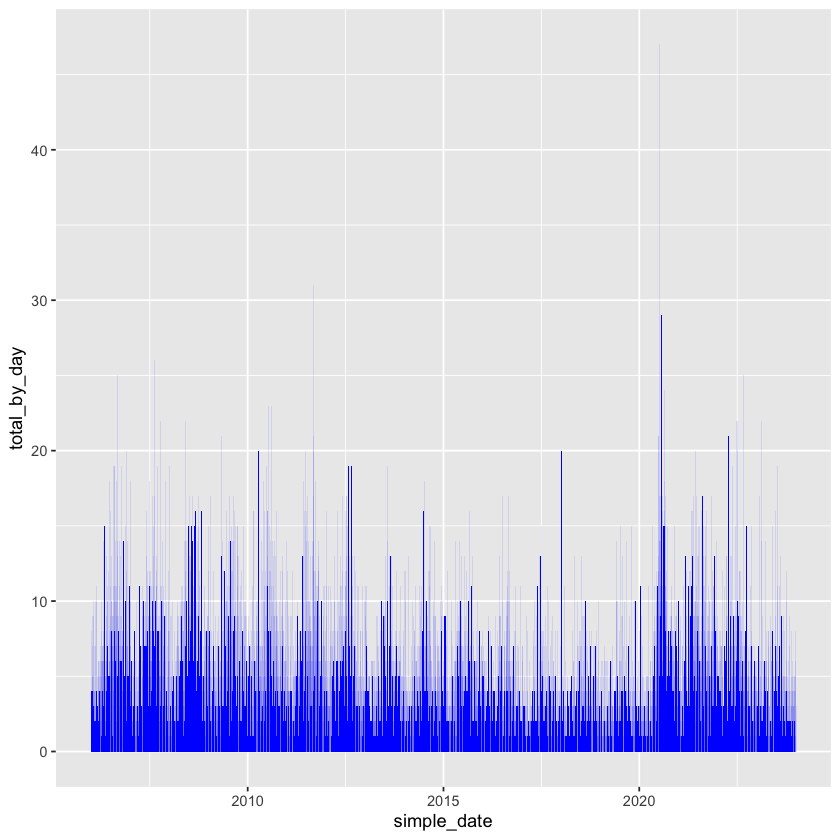

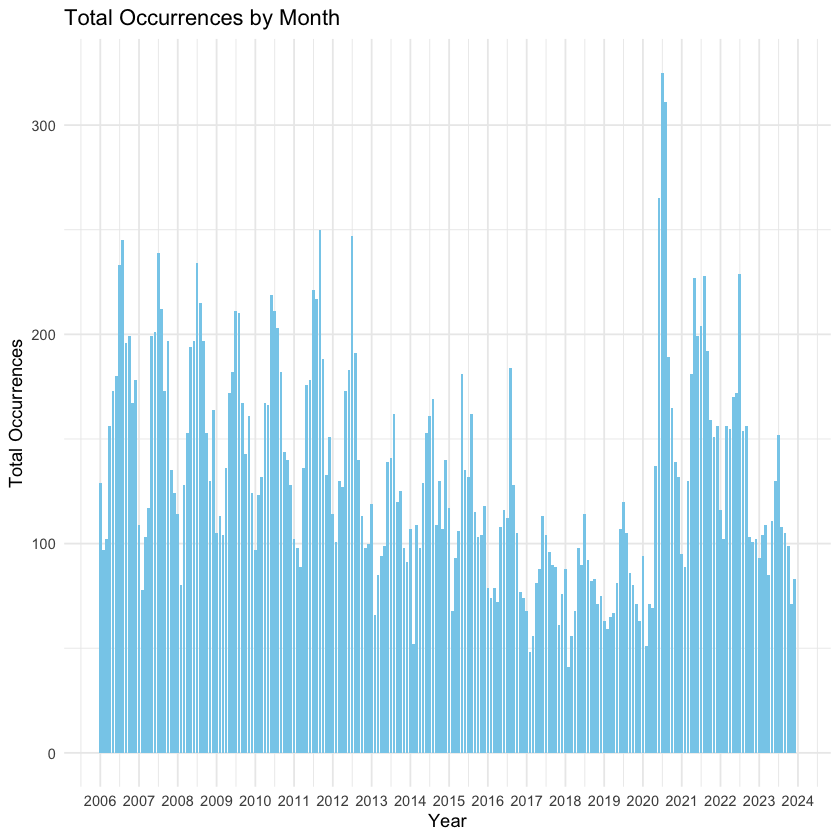

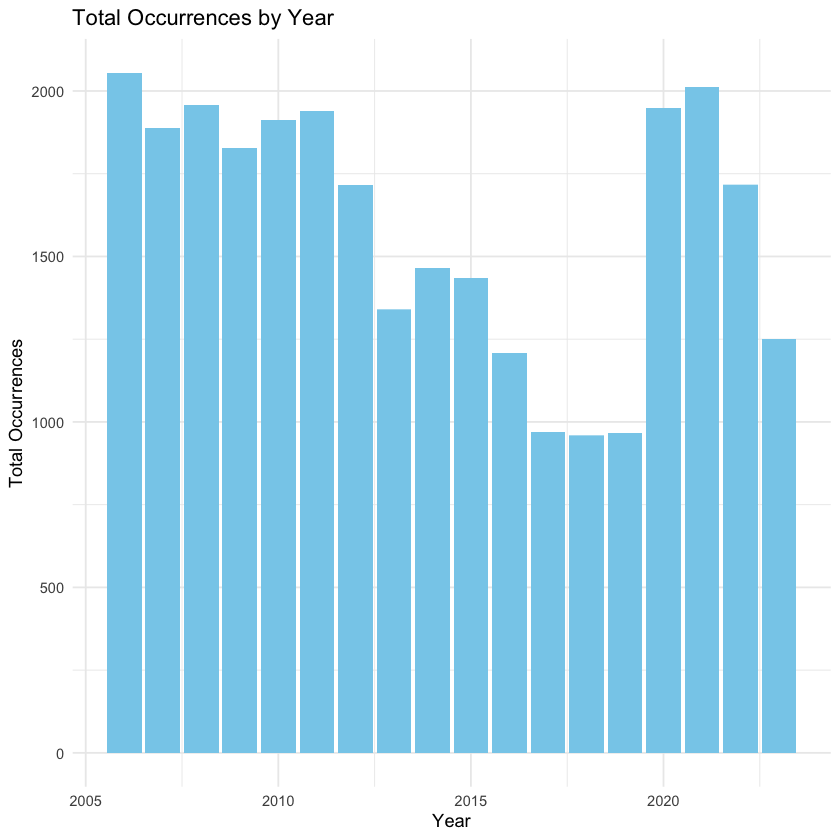

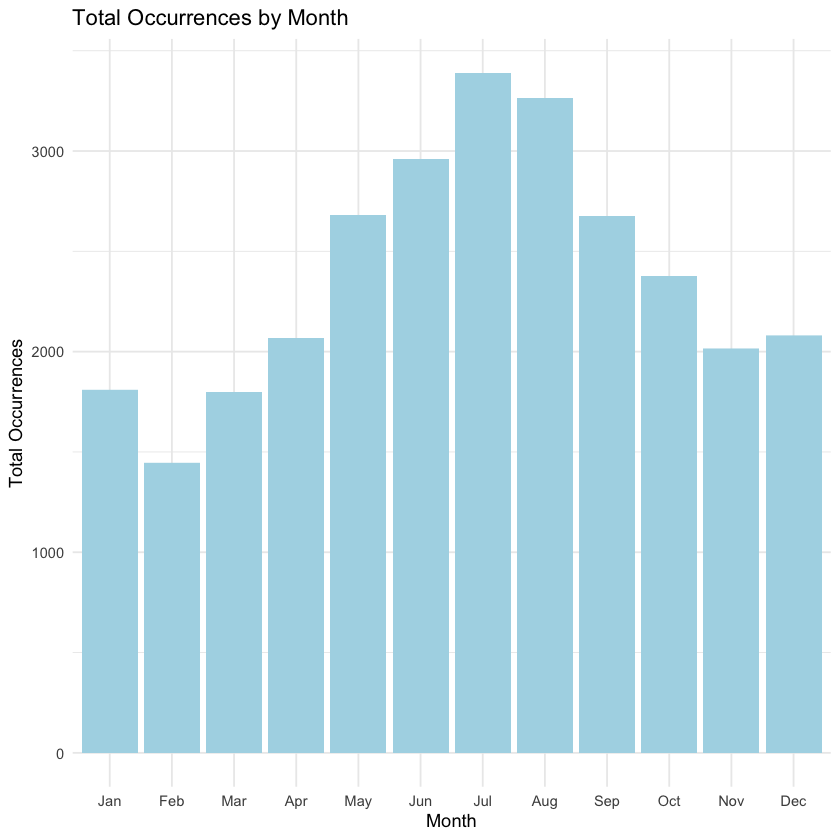

In [7]:
ggplot(time_series_df, aes(x = simple_date, y = total_by_day)) +
geom_line(color = "blue")

ggplot(time_series_df, aes(x = simple_date, y = total_by_day)) +
geom_bar(stat = "identity", fill = "blue")

ggplot(time_series_df, aes(x = month_year, y = total_by_day)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Occurrences by Month", x = "Year", y = "Total Occurrences") +
  theme_minimal() +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year")

ggplot(time_series_df, aes(x = year(simple_date), y = total_by_day)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Occurrences by Year", x = "Year", y = "Total Occurrences") +
  theme_minimal()


# Plot occurrences by month (across all years)
ggplot(time_series_df, aes(x = month(simple_date, label = TRUE), y = total_by_day)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Total Occurrences by Month", x = "Month", y = "Total Occurrences") +
  theme_minimal()



In [8]:
#| label: my_chunk_name
#| echo: false

sum <- 5 + 5 
print(sum)

[1] 10


In [9]:
#| echo: true

name <- 'cody'

paste('The name is',name)


[1] "The name is cody"